### Check GPU information

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [3]:
# import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
print(tf.test.is_built_with_cuda())

True


In [6]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15879746417499006959
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1431542171
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9805740906613770013
physical_device_desc: "device: 0, name: NVIDIA GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


In [7]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [8]:
!nvidia-smi

Fri Dec 30 14:33:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.56       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |    241MiB /  2048MiB |     48%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pip install SciPy

In [1]:
# pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: e:\codes\python\journey data analysis & machine learning\ml environment\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import numpy as np, os, scipy

In [2]:
classifier = Sequential()

### CNN model building

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_path = r'D:\image classification\done\Br35H  Brain Tumor Detection 2020 binary\train'
valid_path = r'D:\image classification\done\Br35H  Brain Tumor Detection 2020 binary\val'
test_path = r'D:\image classification\done\Br35H  Brain Tumor Detection 2020 binary\test'

In [8]:
# total_train, total_val =0, 0

# for _,_, files in os.walk(train_path):
#     total_train += len(files)
# for _,_, files in os.walk(valid_path):
#     total_val += len(files)

# print(f"No of training files {total_train}\nNo of validation files {total_val}")

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1994 images belonging to 2 classes.
Found 570 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


In [10]:
total_train = training_set.samples
total_val = val_set.samples
print(f"No of training files {total_train}\nNo of validation files {total_val}")

No of training files 1994
No of validation files 570


In [18]:
BATCH_SIZE = 16
model = classifier.fit(
    training_set,
#     steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=100,
    validation_data=val_set,
#     validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
63/63 [==============================] - 7s 108ms/step - loss: 0.3300 - accuracy: 0.8521 - val_loss: 0.4467 - val_accuracy: 0.8088
Epoch 2/100
63/63 [==============================] - 7s 107ms/step - loss: 0.3247 - accuracy: 0.8651 - val_loss: 0.5164 - val_accuracy: 0.7789
Epoch 3/100
63/63 [==============================] - 7s 111ms/step - loss: 0.3228 - accuracy: 0.8611 - val_loss: 0.3716 - val_accuracy: 0.8404
Epoch 4/100
63/63 [==============================] - 8s 122ms/step - loss: 0.3082 - accuracy: 0.8761 - val_loss: 0.3186 - val_accuracy: 0.8544
Epoch 5/100
63/63 [==============================] - 8s 127ms/step - loss: 0.3178 - accuracy: 0.8616 - val_loss: 0.3286 - val_accuracy: 0.8474
Epoch 6/100
63/63 [==============================] - 15s 236ms/step - loss: 0.2957 - accuracy: 0.8726 - val_loss: 0.3518 - val_accuracy: 0.8509
Epoch 7/100
63/63 [==============================] - 13s 200ms/step - loss: 0.3041 - accuracy: 0.8711 - val_loss: 0.4323 - val_accuracy: 0.83

Epoch 58/100
63/63 [==============================] - 7s 109ms/step - loss: 0.1513 - accuracy: 0.9433 - val_loss: 0.2328 - val_accuracy: 0.9158
Epoch 59/100
63/63 [==============================] - 7s 107ms/step - loss: 0.1384 - accuracy: 0.9423 - val_loss: 0.3916 - val_accuracy: 0.8719
Epoch 60/100
63/63 [==============================] - 8s 122ms/step - loss: 0.1589 - accuracy: 0.9343 - val_loss: 0.2560 - val_accuracy: 0.9000
Epoch 61/100
63/63 [==============================] - 12s 192ms/step - loss: 0.1305 - accuracy: 0.9488 - val_loss: 0.3968 - val_accuracy: 0.8754
Epoch 62/100
63/63 [==============================] - 10s 162ms/step - loss: 0.1441 - accuracy: 0.9448 - val_loss: 0.2191 - val_accuracy: 0.9298
Epoch 63/100
63/63 [==============================] - 8s 121ms/step - loss: 0.1483 - accuracy: 0.9448 - val_loss: 0.3431 - val_accuracy: 0.8842
Epoch 64/100
63/63 [==============================] - 8s 122ms/step - loss: 0.1497 - accuracy: 0.9438 - val_loss: 0.2294 - val_accurac

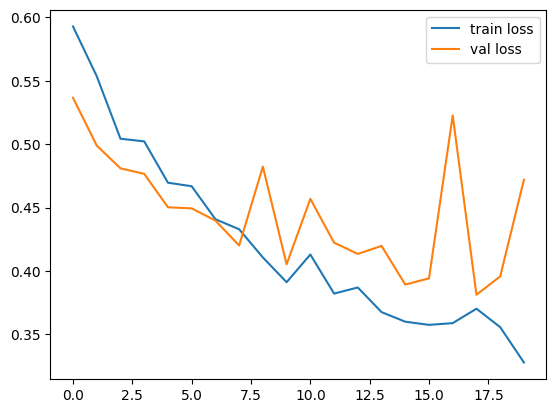

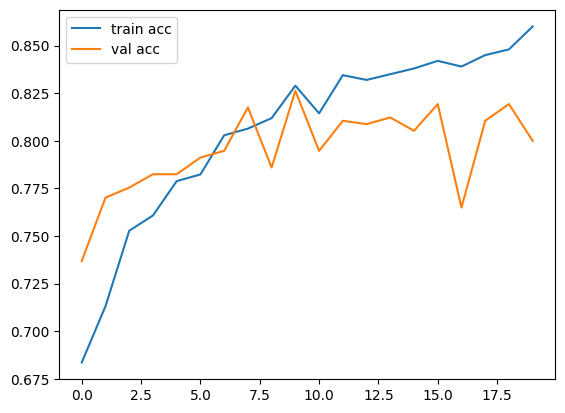

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [14]:
# average training accuracy
import numpy as np
np.mean(model.history['accuracy'])

0.8054914683103561

In [15]:
# val accuracy
classifier.evaluate(val_set)

18/18 [==============================] - 1s 52ms/step - loss: 0.4720 - accuracy: 0.8000


[0.47202444076538086, 0.800000011920929]

In [16]:
# test accuracy
classifier.evaluate(test_set)

9/9 [==============================] - 2s 242ms/step - loss: 0.4409 - accuracy: 0.8077


[0.44089704751968384, 0.807692289352417]

In [17]:
test_set.class_indices

{'no': 0, 'yes': 1}

In [19]:
y_pred = (classifier.predict(test_set) > 0.5).astype("int32")

9/9 [==============================] - 1s 57ms/step


In [20]:
y_true = test_set.labels

In [21]:
from sklearn.metrics import confusion_matrix, classification_report,matthews_corrcoef
predIdxs = y_pred

print('\n')
print(classification_report(test_set.labels, predIdxs,target_names = ['benign','malignant'], digits=5))

print('\n')
mcc = matthews_corrcoef(y_true,y_pred)
print(f"mcc {mcc}")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
pip install scikit-learn